In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
taxi = pd.read_csv('/Users/Eternity/Downloads/taxi_peru.csv', sep=';')


In [11]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [13]:
df = pd.read_csv('/Users/Eternity/Downloads/companies.csv', sep=';')
df.head()

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


### 1.1 Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [18]:
names = 'Name1 Surname1, Name2 Surname2, Name3 Surname3, Name4 Surname4, Name5 Surname5, Name6 Surname6'
names_list = names.split(', ')
print(names_list)

['Name1 Surname1', 'Name2 Surname2', 'Name3 Surname3', 'Name4 Surname4', 'Name5 Surname5', 'Name6 Surname6']


### 1.2 В переменной df содержатся данные как на картинке task2.png (находится в папке с заданием)
Отберите из них только те, где wealth 'medium', а возраст больше 35, и поместите в переменную medium_35
![zzz](./task2.png)

In [139]:
df = pd.DataFrame({
    'client_id': [9002, 6722, 8799, 8738, 5208],
    'sex': [1, 1, 1, 0, 0],
    'wealth': ['medium', 'high', 'high', 'low', 'medium'],
    'age': [63, 54, 62, 54, 37]
})
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8738,0,low,54
4,5208,0,medium,37


In [145]:
df.query('wealth == "medium" and age > 35')

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


### 1.3 Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться больше ли возраст 30 лет (булиновское значение)

In [147]:
df['older_than_30'] = df['age'] > 30
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8738,0,low,54,True
4,5208,0,medium,37,True


### 1.4 А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [151]:
unique_num = df.nunique()
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

### 1.5 У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида: task6.png
Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно)
![zzz](./task6.png)

In [161]:
another_one_df = pd.DataFrame({
    'client_id': [9002, 6722, 8799, 8738, 5208],
    'amount': [42331, 88420, 1714, 80572, 57549],
    'date': [1585425830, 1585429536, 158427761, 1585427077, 1585426290]
})
another_one_df

,client_id,amount,date
0,9002,42331,1585425830
1,6722,88420,1585429536
2,8799,1714,158427761
3,8738,80572,1585427077
4,5208,57549,1585426290


In [158]:
df.merge(another_one_df)

,client_id,sex,wealth,age,older_than_30,amount,date
0,9002,1,medium,63,True,42331,1585425830
1,6722,1,high,54,True,88420,1585429536
2,8799,1,high,62,True,1714,158427761
3,8738,0,low,54,True,80572,1585427077
4,5208,0,medium,37,True,57549,1585426290


### 1.2 Напишите функцию read_n_agg, которая 
- принимает на вход один параметр – путь к файлу
- считывает переданный файл, в котором разделителем является ;
- считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
- возвращает результат этих действий (агрегированный датафрэйм)
Данные выглядят как в task7.png, датасэт в файле companies.csv
![jupyter](./task7.png)

In [19]:
def read_n_agg(path):
    df = pd.read_csv(path, sep=';')
    return df.groupby('company').agg({'income': 'mean'})
    

In [20]:
read_n_agg('./companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10



### 2.1 Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей!
* journey_id – уникальный id поездки
* user_id – id пользователя
* driver_id – id водителя
* taxi_id – id машины
* icon – тип поездки
* start_type – тип заказа (asap, reserved, delayed)
* start_at – время начала поездки
* start_lat – исходное местоположение пользователя, широта
* start_lon – исходное местоположение пользователя, долгота
* end_at – время окончания поездки
* end_lat – итоговое местоположение, широта
* end_lon – итоговое местоположение, долгота
* end_state – состояние заказа
* driver_start_lat – исходное местоположение водителя, широта
* driver_start_lon – исходное местоположение водителя, долгота
* arrived_at – время прибытия водителя
* source – платформа, с которой сделан заказ
* driver_score – оценка водителя клиентом
* rider_score – оценка клиента водителем
Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.
Может пригодиться: read_csv()
Датасет для задания: taxi_peru.csv (в папке).

In [27]:
taxi = pd.read_csv('./taxi_peru.csv', sep=';', parse_dates = ['start_at', 'end_at', 'arrived_at'])

In [28]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


### 2.2 Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [31]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [32]:
taxi.columns

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'source', 'driver_score', 'rider_score'],
      dtype='object')

In [33]:
taxi.shape

(23111, 19)

In [48]:
round(taxi.source.value_counts().max() / taxi.source.value_counts().sum() * 100, 2)

42.37

In [59]:
round((
    taxi
        .source
        .value_counts(normalize=True)
        .mul(100)
        .max()
), 2)

42.37

### 2.3 Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- Посчитайте частоту встречаемости каждой из оценок
- Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
- Сбросьте индексы
- Переименуйте колонки в driver_score и percentage
- Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
- Запишите результат в driver_score_counts
Полезные функции:
.mul() – умножение, более удобный вариант для использования в цепочке методов 
.round() – округление
.reset_index() – сбросить индекс
.value_counts() – сколько раз встречается каждое значение переменной

In [102]:
driver_score_count = (
taxi
    .driver_score
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .reset_index()
    .rename(columns={'index':'driver_score','driver_score':'percentage'})
    .sort_values('driver_score')
)
driver_score_count

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


### 2.3 Теперь строим график! (task11.png) Сначала импортируем библиотеки:
import seaborn as sns
import matplotlib.pyplot as plt
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()
![zzz](./task11.jpg)

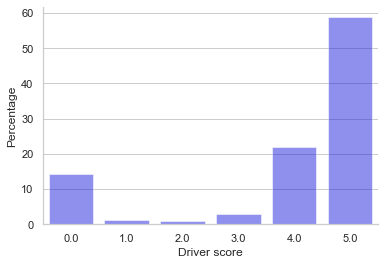

In [120]:

ax = sns.barplot(x='driver_score',  y="percentage", data=driver_score_count, color='blue',alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()

### 2.4 Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [124]:
taxi.rider_score

0        5.0
1        NaN
2        NaN
3        NaN
4        5.0
        ... 
23106    5.0
23107    5.0
23108    0.0
23109    5.0
23110    NaN
Name: rider_score, Length: 23111, dtype: float64

In [132]:
rider_score_count = (
    taxi
        .rider_score
        .value_counts(normalize=True)
        .mul(100)
        .round(2)
        .reset_index()
        .rename(columns=({'index': 'rider_score', 'rider_score': 'percentage'}))
        .sort_values('rider_score')
)
rider_score_count

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


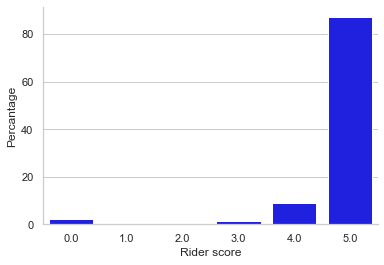

In [137]:
bx = sns.barplot(x='rider_score', y='percentage', data=rider_score_count, color='blue')
bx.set(xlabel='Rider score', ylabel='Percantage')
sns.despine()